In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../Scripts')
from measfilter import param_record, getData0,read_params
from gatesimu import Gateexp, output_gate, read_data, gate_circ, plotComparsion

# Parameters
interested_qubits = [1,2]
gate_num = 200
gate_type = 'X'

itr = 64
shots = 8192
file_address = 'T6/'
noise_file_address = 'Noise/'

# Collect U3-Gate Data
# param_record(backend, itr = itr, shots = shots, file_address = noise_file_address)
for q in interested_qubits:
    Gateexp(gate_num, gate_type, q, itr, backend, file_address =file_address)

Circ depth is  201
Job Status: job has successfully run
Circ depth is  201
Job Status: job has successfully run


Qubit  1
Given Lambdas [0.974      0.958      0.00525036]
Final Accepted Posterior Lambdas
M: 5.73584 Index: 15450 pi_obs = 24.6493 pi_Q(prior) = 4.29741
Accepted Number N: 5339, 0.178
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92218947 0.8962489  0.01110495]
Posterior Lambda Mode [0.97437404 0.92690117 0.01059503]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00111159
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


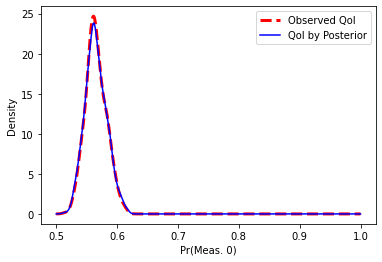

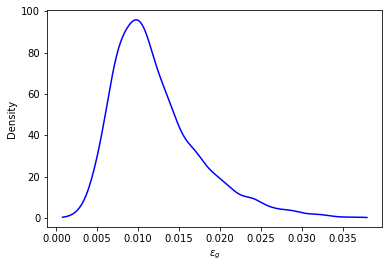

Qubit  2
Given Lambdas [0.977      0.964      0.00247759]
Final Accepted Posterior Lambdas
M: 4.33529 Index: 14129 pi_obs = 9.81481 pi_Q(prior) = 2.26393
Accepted Number N: 6918, 0.231
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92216346 0.89213762 0.00688147]
Posterior Lambda Mode [0.97611789 0.9371563  0.00606229]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00220779
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


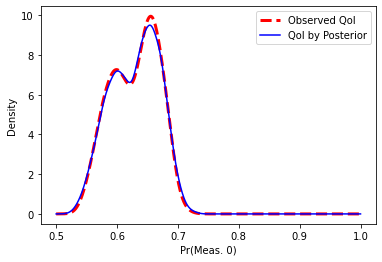

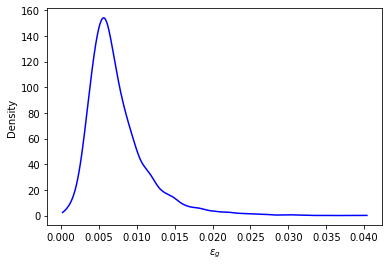

In [3]:
M = 30000
gate_sd = 0.01
meas_sd = 0.1
info = {}

params = read_params(file_address = noise_file_address)
for q in interested_qubits:
    print('Qubit ',q)
    data = read_data(q, gate_type, gate_num, file_address = file_address)
    d = getData0(data, int(itr*shots/1024), q)
    _,post_lambdas = output_gate(d, q, M, params, gate_sd, meas_sd, gate_type, gate_num, file_address = file_address)
    info['Qubit' + str(q)] = post_lambdas

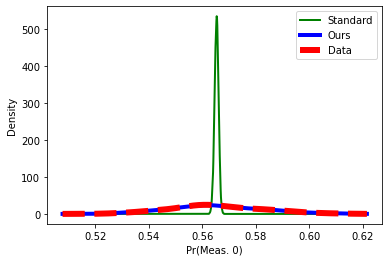

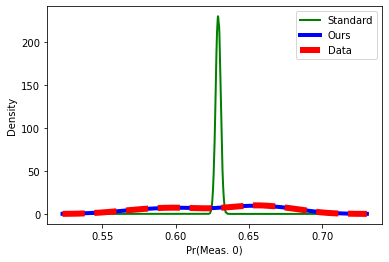

In [5]:
for q in interested_qubits:
    d = getData0(read_data(q, gate_type, gate_num, file_address = file_address), int(itr*shots/1024), q)
    plotComparsion(d, info['Qubit'+str(q)], q, file_address = file_address)